In [61]:
import pandas as pd
from fbprophet import Prophet

Load reservation data and merge columns.

In [62]:
df = pd.read_csv("SELECT_overnattingsdato__koienavn__SUM_a.csv", header=None)
df.columns=["ds", "Koie", "M", "NM"]
df.head()

,ds,Koie,M,NM
0,1999-10-08,Agdenes,2,0
1,1999-10-09,Agdenes,5,2
2,1999-10-15,Agdenes,6,1
3,1999-10-16,Agdenes,6,1
4,1999-10-22,Agdenes,5,5


In [63]:
df["y"] = df["M"] + df["NM"]
df = df.drop(["M", "NM"], axis=1)
df.head()

,ds,Koie,y
0,1999-10-08,Agdenes,2
1,1999-10-09,Agdenes,7
2,1999-10-15,Agdenes,7
3,1999-10-16,Agdenes,7
4,1999-10-22,Agdenes,10


Group the dataframe by cabin name

In [64]:
gdf = df.groupby("Koie")
gdf.sum()

,y
Koie,
Agdenes,6042
Brygga,286
Flåkoia,18577
Fosenkoia,7461
Heinfjordstua,23032
Hognabu,4995
Holmsåkoia,12226
Holvassgamma,4958
Iglbu,5524


Lets work with flåkoia

In [65]:
flaDF = gdf.get_group("Flåkoia")
flaDF.reset_index()
flaDF_train = flaDF.iloc[:2700]
flaDF_test = flaDF.iloc[2700:]

In [66]:
flaDF_train.shape

(2700, 2)

In [67]:
flaDF_test.shape

(351, 2)

In [75]:
flaDF_train.tail()

,ds,y
4337,2018-01-25,3
4338,2018-01-26,11
4339,2018-01-27,10
4340,2018-01-28,11
4341,2018-01-29,5


In [69]:
m = Prophet()
m.fit(flaDF_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
future = m.make_future_dataframe(periods=365)

In [82]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3060,2019-01-25,9.428655,5.038704,13.628878
3061,2019-01-26,10.061328,5.830230,14.514143
3062,2019-01-27,7.793719,3.697012,12.289729
3063,2019-01-28,7.390786,3.160027,11.822561
3064,2019-01-29,6.737962,2.269512,11.080908


/home/espen/Source/koieprofet/env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


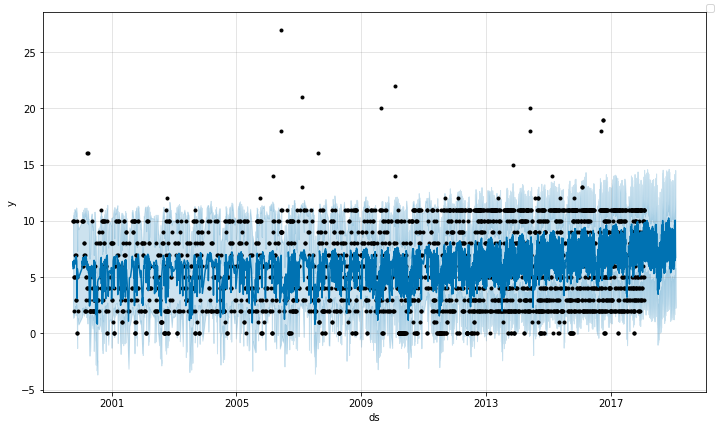

In [86]:
fig1 = m.plot(forecast)